# Data cleaning

## Representatives
- office room and phone columns deleted -> we don't need them
- NaNs in comittee list replaced with empty string
- Example of extracting comittees by splitting the string

In [701]:
import pandas as pd

def split_comittees(comittees: str):
    if comittees == "":
        return []
    return comittees.split("|")

# Chosen representatives
df = pd.read_csv('data/chosen_representatives.csv')
df = df.drop(["office_room", "phone"], axis=1)
df["committee"] = df["committee"].fillna("")
df.to_csv('data/cleaned_chosen_representatives.csv') 

In [702]:
# All representatives
df = pd.read_csv('data/representatives.csv')
df = df.drop(["office_room", "phone"], axis=1)
df["committee"] = df["committee"].fillna("")
df.to_csv('data/cleaned_representatives.csv') 

### All representatives

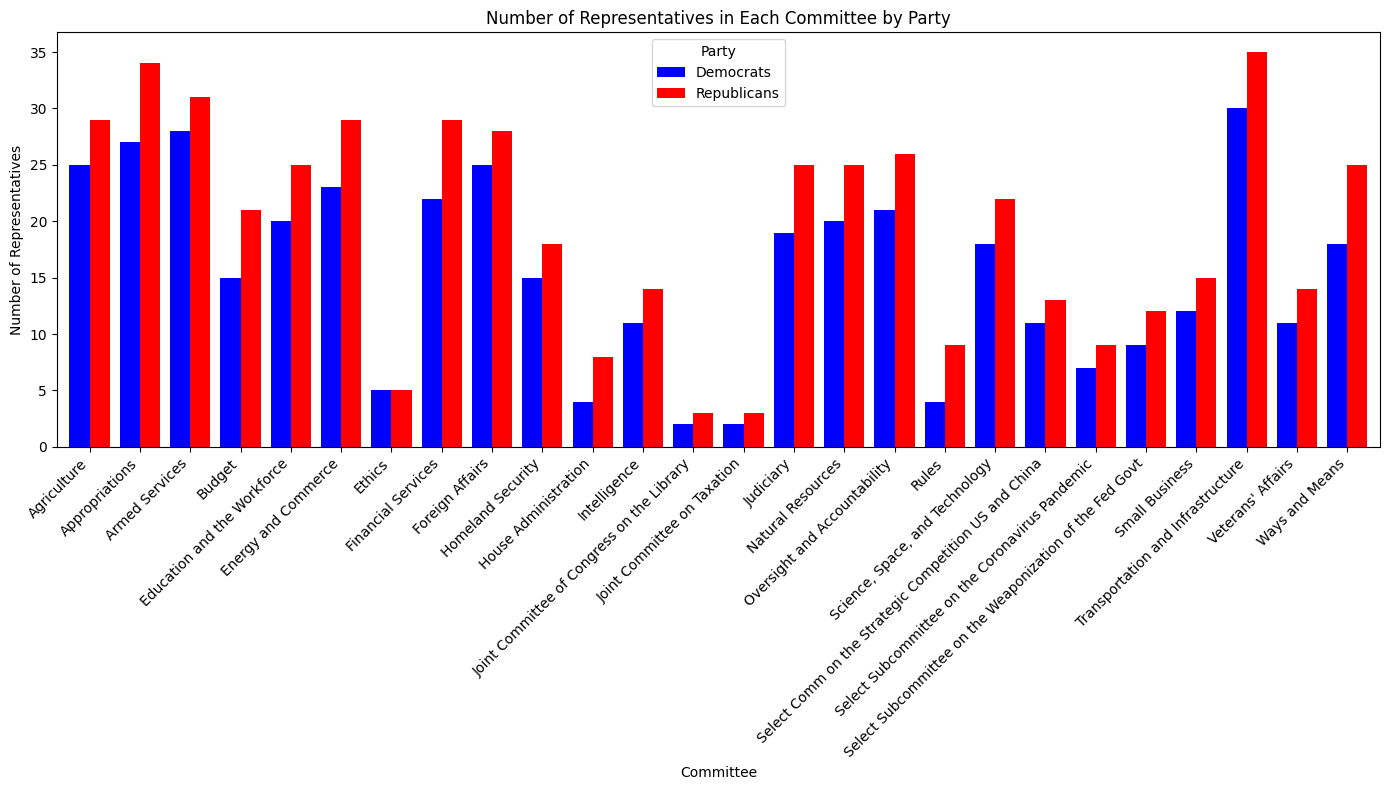

In [703]:
import pandas as pd
import itertools
import matplotlib.pyplot as plt

df["committee"] = df["committee"].transform(split_comittees)

col_list_D = df.loc[df['party'] == 'D']['committee'].values.tolist()
col_list_R = df.loc[df['party'] == 'R']['committee'].values.tolist()
merged_list_D = list(itertools.chain.from_iterable(col_list_D))
merged_list_R = list(itertools.chain.from_iterable(col_list_R))

committee_counts_D = pd.Series(merged_list_D).value_counts()
committee_counts_R = pd.Series(merged_list_R).value_counts()

# Combine counts into a single DataFrame
committee_counts = pd.DataFrame({
    'Democrats': committee_counts_D,
    'Republicans': committee_counts_R
}).fillna(0)  # Fill NaN values with 0

# Plot the bar chart
bar_colors = ['blue', 'red']
committee_counts.plot(kind='bar', figsize=(14, 8), width=0.8, color=bar_colors)
plt.xlabel('Committee')
plt.ylabel('Number of Representatives')
plt.title('Number of Representatives in Each Committee by Party')
plt.legend(title='Party')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('charts/comitees_per_party.png')

plt.show()


## Articles
- date changed to standard format '%Y-%m-%d'
- reduced number of issues, grouped as defined in `topics` dict

### Date standarization

In [704]:
from datetime import datetime

def parse_date(date_str):
    for fmt in ('%B %d, %Y', '%Y-%m-%d', '%m/%d/%Y'):  # Add any other formats you expect
        try:
            return datetime.strptime(date_str, fmt)
        except ValueError:
            continue
    return pd.NaT  # Return NaT if no format matches

df_art = pd.read_csv('data/articles.csv', index_col="idx")
df_art['date'] = df_art['date'].apply(parse_date)
df_art = df_art.dropna(subset=['date'])
df_art['date'] = df_art['date'].dt.strftime('%Y-%m-%d')


In [705]:
df_art["representative_name"].value_counts()

representative_name
Bishop, Sanford              3573
Miller-Meeks, Mariannette    1488
LaMalfa, Doug                1026
Larson, John                  941
Radewagen, Aumua Amata        921
Boebert, Lauren               873
Davids, Sharice               828
Scalise, Steve                773
Pocan, Mark                   537
Bost, Mike                    489
Mrvan, Frank                  447
Sewell, Terri                 440
Mann, Tracey                  373
Soto, Darren                  297
Comer, James                  154
Carl, Jerry                    85
Gaetz, Matt                    84
Name: count, dtype: int64

In [706]:
df_art["text"].count()

np.int64(13328)

### Topic standarization

In [707]:
topics = {
    "Agriculture & Rural Development": "Agriculture",
    
    "Defense" : "National Security, Defence and Veterans issues",
    "Border Security": "National Security, Defence and Veterans issues",
    "Armed Services": "National Security, Defence and Veterans issues",
    "Connecticut’s Defense Industry": "National Security, Defence and Veterans issues",
    "Homeland Security": "National Security, Defence and Veterans issues",
    "Military, Veterans, & National Security": "National Security, Defence and Veterans issues",
    "National Security and Veterans": "National Security, Defence and Veterans issues",
    "Military & Veterans": "National Security, Defence and Veterans issues",
    "Veterans and Defense": "National Security, Defence and Veterans issues",
    "Veterans Issues": "National Security, Defence and Veterans issues",
    "Veterans and Defense": "National Security, Defence and Veterans issues",
    "Defense and National Security": "National Security, Defence and Veterans issues",
    "Veterans": "National Security, Defence and Veterans issues",
    "National Security": "National Security, Defence and Veterans issues",
    "Military Servicemembers and Veterans": "National Security, Defence and Veterans issues",
    "Veterans & Armed Forces": "National Security, Defence and Veterans issues",
    "2nd Amendment Rights": "National Security, Defence and Veterans issues",
				"Second Amendment": "National Security, Defence and Veterans issues",
    "Defense and Security": "National Security, Defence and Veterans issues",
    "2nd Amendment": "National Security, Defence and Veterans issues",
    
    "Economy & Jobs (Small Business)": "Jobs and the Economy",
    "Economy and Jobs": "Jobs and the Economy",
    "Economy, Financial Services, & Trade": "Jobs and the Economy",
    "Business & Employers": "Jobs and the Economy",
    "Jobs & Workforce": "Jobs and the Economy",
    "Jobs and Workforce Development": "Jobs and the Economy",
    "Jobs and the Workforce": "Jobs and the Economy",
    "Economy": "Jobs and the Economy",
    "Inflation and the Economy": "Jobs and the Economy",
    "Building an Economy that Works for Everyone": "Jobs and the Economy",
    "Jobs & Economic Growth": "Jobs and the Economy",
    "Jobs, Economy & Small Businesses": "Jobs and the Economy",
    "Small Business": "Jobs and the Economy",
    "Small Business and Economy": "Jobs and the Economy",

    "Energy": "Energy and Environment",
    "Energy & Environment": "Energy and Environment",
    "Energy And Environment": "Energy and Environment",
    "Energy and Natural Resources": "Energy and Environment",
    "Environment": "Energy and Environment",
    "Natural Resources": "Energy and Environment",
    "Energy, Conservation, & Interior Department": "Energy and Environment",
    "Public Lands & Environment": "Energy and Environment",
    "Water": "Energy and Environment",
    "Forestry": "Energy and Environment",
    "Disaster Relief & Preparedness": "Energy and Environment",
    "Maritime": "Energy and Environment",
    "Hurricane Recovery and Coastal Restoration": "Energy and Environment",
    "Fisheries": "Energy and Environment",

    "Tax Reform": "Federal Budget and Taxes",
				"Taxes and Spending": "Federal Budget and Taxes",
    "Federal Budget, Appropriations, & Taxes": "Federal Budget and Taxes",
    "Budget": "Federal Budget and Taxes",
    "Federal Spending and Borrowing": "Federal Budget and Taxes",
    "Fiscal Discipline": "Federal Budget and Taxes",
    "Fiscal Responsibility": "Federal Budget and Taxes",
    "Federal Budget, Jobs, & the Economy": "Federal Budget and Taxes",
    "Spending Cuts & Debt": "Federal Budget and Taxes",
                
				"Health": "Health Care and Social Security", 
    "Healthcare": "Health Care and Social Security",
    "Healthcare, Social Security, & Support Programs": "Health Care and Social Security",
    "Social Security and Medicare": "Health Care and Social Security",
    "Improving Access to Affordable Healthcare": "Health Care and Social Security",
    "Social Security": "Health Care and Social Security",
    "Health Care": "Health Care and Social Security",
    
				"Senior Citizens": "Supporting Seniors",
    "Seniors": "Supporting Seniors",
    
				"Foreign Affairs": "Foreign Policy and Immigration",
				"Immigration": "Foreign Policy and Immigration",
    "Foreign Policy": "Foreign Policy and Immigration",
                
				"Puerto Rico": "Local issues",
    "Connecticut Manufacturing": "Local issues",
    "Coltsville": "Local issues",
    
    "Making Government Work for Kansans": "Local issues", 
    "Standing up for Local Communities": "Local issues", 
    "Building Our Communities": "Local issues", 
    "Community Groups & News": "Local issues", 
    
				"Transportation": "Infrastructure and Transportation",
    "Infrastructure": "Infrastructure and Transportation",
    "Transportation & Infrastructure": "Infrastructure and Transportation",
    
				"Congressional Issues": "Government and Law",
				"Congress": "Government and Law",
				"Law Enforcement": "Government and Law",
				"Judiciary": "Government and Law",
    "Oversight and Accountability": "Government and Law",
    "Delivering Results": "Government and Law",
    "Oversight and Reform": "Government and Law",
                
				"Women": "Equality and Civil Rights",
				"Equality": "Equality and Civil Rights",
				"Law, Individual Rights, & Equality": "Equality and Civil Rights",
    "Rights & Freedoms": "Equality and Civil Rights",
				"Voting & Civil Rights": "Equality and Civil Rights",
    "Protecting the Right to Vote": "Equality and Civil Rights",
    "Election Integrity": "Equality and Civil Rights",
    "Voting Rights": "Equality and Civil Rights",
                
				"Education and Opportunity": "Education",
    "Expanding Educational Opportunities": "Education",
    
				"Communication and Technology": "Science, Technology, & Telecommunications",
    "Finance & Technology": "Science, Technology, & Telecommunications",
                
				"Family Values": "Pro-Life/Abortion and Family Values",
				"Pro-Life and Family Values": "Pro-Life/Abortion and Family Values",
                
				"Back the Blue": "undef",
				"Crumbling Foundations": "undef",
    "Program Awards & Announcements": "undef",
    "Getting Things Done": "undef",
    "Public Service & Crime Prevention": "undef",
    "Financial Services": "undef",
    "Vice Chairman of Congressional Steel Caucus": "undef",
    "Supporting Organized Labor": "undef",
    "Ranking Member of House Veterans’ Affairs Subcommittee on Oversight and Investigations": "undef",
    "Congressional Steel Caucus": "undef",
    "Helping Families": "undef",
    "Housing and Community Development": "undef",
    "Life": "undef",
    "Education and Labor": "undef",
    "Native American Communities": "undef",
    "Congressman Larson's Committees": "undef"
}

In [708]:
def isEducation(title: str):
    """Checks if the title is education-related using more specific keywords."""
    keywords = ["school", "college", "university", "academy", "institute", "education", "learning", "child"]
    title = title.lower()
    return any(keyword in title for keyword in keywords)

df_art.loc[(df_art["issue"] == "Education and Labor") & (df_art["title"].apply(isEducation)), "issue"] = "Education"

In [709]:
def isSocialSecurity(title: str):
    keywords = ["social security"]
    title = title.lower()
    return any(keyword in title for keyword in keywords)

def isSeniors(title: str):
    keywords = ["senior"]
    title = title.lower()
    return any(keyword in title for keyword in keywords)

def isTaxes(title: str):
    keywords = ["tax"]
    title = title.lower()
    return any(keyword in title for keyword in keywords)

def isAbortion(title: str):
    keywords = ["abortion"]
    title = title.lower()
    return any(keyword in title for keyword in keywords)

df_art.loc[(df_art["issue"] == "Congressman Larson's Committees") & (df_art["title"].apply(isSocialSecurity)), "issue"] = "Social Security"
df_art.loc[(df_art["issue"] == "Congressman Larson's Committees") & (df_art["title"].apply(isSeniors)), "issue"] = "Supporting Seniors"
df_art.loc[(df_art["issue"] == "Congressman Larson's Committees") & (df_art["title"].apply(isTaxes)), "issue"] = "Taxes"
df_art.loc[(df_art["issue"] == "Congressman Larson's Committees") & (df_art["title"].apply(isAbortion)), "issue"] = "Pro-Life/Abortion and Family Values"

In [710]:
import numpy as np

def standardize_topic(topic: str):
    return topics.get(topic, topic)
np.unique(df_art["issue"].transform(standardize_topic).to_list())

array(['Agriculture', 'Constitutional Issues', 'Education',
       'Energy and Environment', 'Equality and Civil Rights',
       'Federal Budget and Taxes', 'Foreign Policy and Immigration',
       'Government and Law', 'Health Care and Social Security',
       'Infrastructure and Transportation', 'Jobs and the Economy',
       'Local issues', 'National Security, Defence and Veterans issues',
       'Pro-Life/Abortion and Family Values',
       'Science, Technology, & Telecommunications', 'Supporting Seniors',
       'Taxes', 'undef'], dtype='<U46')

In [711]:
df_art["issue"] = df_art["issue"].apply(standardize_topic)
df_art = df_art[df_art["issue"] != "undef"]
df_art = df_art.dropna()
df_art = df_art.reset_index(drop=True)
df_art = df_art.drop_duplicates(subset=['issue', 'title', 'date']) #Remove duplicates created after mapping. Title and Date are considered to make an unique key per article
df_art.to_csv('data/cleaned_articles.csv') 

In [712]:
import re
def clean_up_text(text: str):
    if "[[" in text:
        return pd.NA
    text = text.replace("\n", " ")
    text = text.replace("\t", " ")
    text = text.replace("\xa0", " ")
    text = text.replace("###", "")
    text = text.replace("# # #", "")
    text = text.replace("       Image     ", " ")
    text = re.sub(r"<{2,}", "", text)
    text = re.sub(r">{2,}", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

In [713]:
df_art["text"] = df_art["text"].apply(clean_up_text)
df_art = df_art.dropna()

In [714]:
df_art["representative_name"].value_counts()

representative_name
Bishop, Sanford              2686
Miller-Meeks, Mariannette    1460
LaMalfa, Doug                 969
Radewagen, Aumua Amata        913
Davids, Sharice               827
Larson, John                  796
Boebert, Lauren               730
Pocan, Mark                   536
Bost, Mike                    438
Sewell, Terri                 372
Mann, Tracey                  330
Mrvan, Frank                  320
Soto, Darren                  297
Comer, James                  147
Carl, Jerry                    85
Gaetz, Matt                    79
Name: count, dtype: int64

In [715]:
df_art["text"].count()

np.int64(10985)

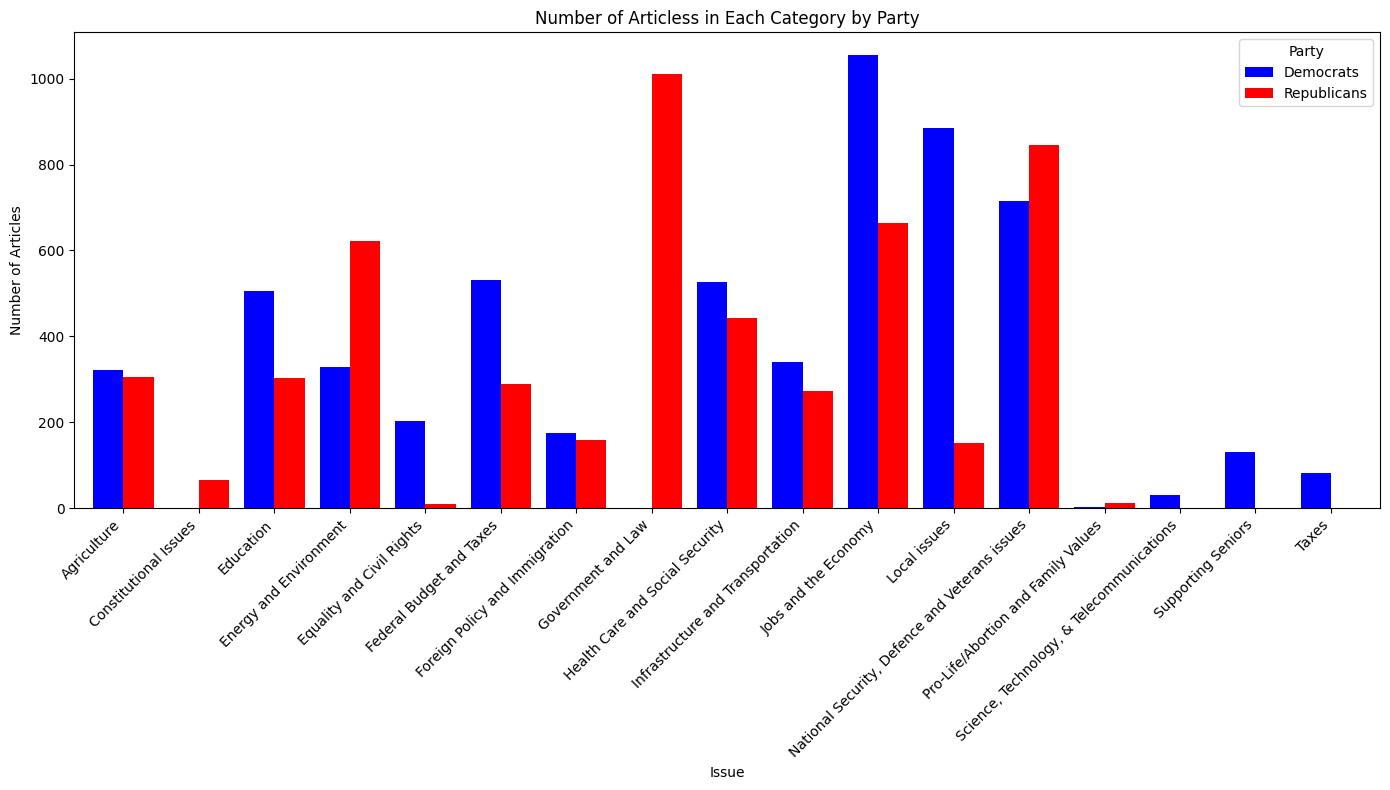

In [716]:
import pandas as pd
import matplotlib.pyplot as plt

col_list_D = df_art.loc[df_art['representative_party'] == 'D']['issue'].values.tolist()
col_list_R = df_art.loc[df_art['representative_party'] == 'R']['issue'].values.tolist()

committee_counts_D = pd.Series(col_list_D).value_counts()
committee_counts_R = pd.Series(col_list_R).value_counts()

# Combine counts into a single DataFrame
committee_counts = pd.DataFrame({
    'Democrats': committee_counts_D,
    'Republicans': committee_counts_R
}).fillna(0)  # Fill NaN values with 0

# Plot the bar chart
bar_colors = ['blue', 'red']
committee_counts.plot(kind='bar', figsize=(14, 8), width=0.8, color=bar_colors)
plt.xlabel('Issue')
plt.ylabel('Number of Articles')
plt.title('Number of Articless in Each Category by Party')
plt.legend(title='Party')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.savefig('charts/articles_per_issue.png')

plt.show()

### Multilabelling

In [717]:
def merge_duplicates(group):
    issues = ';'.join(group['issue'].tolist())
    new_row = group.iloc[0].copy()
    new_row['issue'] = issues
    return new_row

df_merged = df_art.groupby(['title', 'date', 'representative_name']).apply(merge_duplicates).reset_index(drop=True)
df_merged.to_csv('data/cleaned_merged_articles.csv') 
print("Number of rows in the DataFrame:", df_merged.shape[0])

/tmp/ipykernel_1338/3743731413.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_merged = df_art.groupby(['title', 'date', 'representative_name']).apply(merge_duplicates).reset_index(drop=True)


Number of rows in the DataFrame: 7190


In [718]:
df_merged["representative_name"].value_counts()

representative_name
Bishop, Sanford              1138
Radewagen, Aumua Amata        885
Miller-Meeks, Mariannette     797
LaMalfa, Doug                 711
Larson, John                  645
Davids, Sharice               637
Pocan, Mark                   423
Sewell, Terri                 328
Bost, Mike                    324
Boebert, Lauren               318
Mrvan, Frank                  304
Soto, Darren                  263
Mann, Tracey                  208
Comer, James                  111
Gaetz, Matt                    54
Carl, Jerry                    44
Name: count, dtype: int64